# Домашнее задание к лекции "Статистика. Практика"

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16,8

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

### Нравится (рейтинг = 75)
**H0** - средняя выборки `Critic_Score`  совпадает с 75 + 95% доверительный интервал  
**H1** - средняя выборки `Critic_Score` НЕ совпадает с 75

positive = 75         # Если критикам нравятся, то будут ставить средний рейтинг 75  
confidence = 0.05     # принимаем 95% доверительный интервал

In [41]:
df = pd.read_csv('vgsales.csv', error_bad_lines=True)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
critic_score_sport = list(df.loc[df.Genre.str.contains('Sports', na=False),'Critic_Score' ])
critic_score_sport = np.array([x for x in critic_score_sport if ~np.isnan(x)])

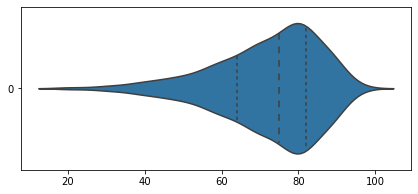

In [43]:
plt.figure(figsize=(7,3))
sns.violinplot(orient='h', data=critic_score_sport, inner='quartile', gridsize=100);

Средняя ближе к 75, коробка смещена вправо. Проверим на нормальность

In [44]:
confidence = 0.01 #1%
shap = stats.shapiro(critic_score_sport)
print(f'st={shap[0]:.3f}, p_val={shap[1]:.3f} ')
if shap[1] > confidence: print('Распределение нормально') 
else: print('Распределение НЕ нормально')

st=0.940, p_val=0.000 
Распределение НЕ нормально


In [45]:
print('Сравниваем с рейтингом 75')
student_c = stats.ttest_1samp(critic_score_sport,popmean= positive)
print(f'st = {student_c[0]:.3f},p_val = {student_c[1]:.3f}' )
print('-'*35)
print(f'\tЕсли верна H0, то с вероятностью {student_c[1]*100:.0f}% получить значения {positive} ')

if student_c[1] < confidence: 
    print(f'\tДостаточно оснований отклонить нулевую гипотезу Н0. \n\t--> Средняя рейтингов критиков по категории игр "Sport" не находится рядом с 75')

Сравниваем с рейтингом 75


NameError: name 'positive' is not defined

In [ ]:
#Проверим
positive = 75
sigma = np.std(critic_score_sport, ddof =1)
m = np.array(critic_score_sport).mean()
st = (75 - m)/sigma
median = np.median(critic_score_sport)
se = sigma/len(critic_score_sport)
print(f'st = {st:.2f} , mean = {m:.2f}, median = {median:.0f} , sigma = {sigma:.1f}, se= {se:.3f}')

In [ ]:
#найдем 95% доверительный интервал всех оценок критиков категории игр "Спорт" 
confidence = 0.05
Z = stats.norm.ppf( (1 - confidence/2 ) )
delta = Z * sigma
print(f'{(1-confidence)*100:.0f}% доверительный интервал всех оценок критиков:  от { m-delta:.1f} до { m+delta:.1f}') 

#Теперь найдем 95% доверительный интервал **средней** Ген Совокупности (ГС) оценок критиков категории игр "Спорт" 
delta_se = Z * se
print(f'{(1-confidence)*100:.0f}% доверительный интервал средней ГС всех оценок критиков:  от { m-delta_se:.1f} до { m+delta_se:.1f}') 


### Другими словами:
- рейтинг критиков находится от 45 до 99 с 95% вероятностью.  
    Или, в среднем критики ставят играм со спортом рейтинг от 45 до 99 с 95% вероятностью.
> Если выйдет новая игра категории "Спорт", то критики ей дадут рейтинг от 45 до 95 с 95% вероятностью. 
- Средняя ГС всех оценок критиков играм со спортом находится между 71.9 и 72. 
> Если выйдет новая игра категории "Спорт", то её рейтинг критиков будет принадлежать генеральной совокупности со средней  между 71.9 и 72.

### Вывод:
Критики симпатизируют играм со спортом, но (в принятых шкалах градаций) нельзя сказать, что игры со спортом нравятся критикам.

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(critic_score_sport, bins = 80);
plt.plot([m , m], [54,0], c= 'orange')
plt.text(m, 55, 'Среднее из задачи', c= 'orange', rotation = 'horizontal', ha = 'center')

plt.plot([m-delta , m-delta], [54,0], c= 'green')
plt.text(m-delta, 55, 'Доверительный интервал -', c= 'green', rotation = 'horizontal', ha = 'center')
plt.plot([m+delta , m+delta], [54,0], c= 'green')
plt.text(m+delta, 55, 'Доверительный интервал +', c= 'green', rotation = 'horizontal', ha = 'center')
plt.title('\nГистограмма рейтингов критиков, со средним рейтингом и 95% доверительным интервалом всех значений\n' );

PS. Так как распределение НЕ нормальное, то использовать т-тест не корректно, и вместо средней корректней использовать медиану. Медиана = 75, то есть большинству критиков нравятся игры со спортом.

### 2) Критикам нравятся больше игры на PC или на PS4?

В данной задаче необходимо сравнить две выборки, принадлежат ли они одной ГС:  
> если да -> критики безпристрастны играм из этих платформ  
> если нет -> это говорит о том, что есть достаточно остнований утверждать что средние игр на `PC` и `PS4` различаются. нужно просто сравнить средние

**H0** - выборки `PC` и `PS4` совпадают  
**H1** - выборки `PC` и `PS4` различаются - > средние НЕ совпадают.

confidence = 0.01 # 5% уровень значимости

In [ ]:
df.Platform.unique()

In [ ]:
# Make samples:
#PC
critic_score_PC_sport = list( df.loc[df.Platform.str.contains('PC', na=False),'Critic_Score'] )
critic_score_PC_sport = np.array([x for x in critic_score_PC_sport if ~np.isnan(x)])
#PS4
critic_score_PS4_sport = list( df.loc[df.Platform.str.contains('PS4', na=False),'Critic_Score'] )
critic_score_PS4_sport = np.array([x for x in critic_score_PS4_sport if ~np.isnan(x)])

In [ ]:
fig = plt.figure(figsize=(12, 4))
plt.violinplot(dataset = critic_score_PC_sport,vert = False, showmeans = True)
plt.violinplot(dataset = critic_score_PS4_sport,vert = False, showmeans = True)

import matplotlib.patches as mpatches
orange_patch = mpatches.Patch(color='orange')
blue_patch = mpatches.Patch(color='blue')
plt.legend( [orange_patch,blue_patch],['PC','PS4'] );

In [ ]:
#Проверка на нормальность
confidence = 0.01 #1%
shap = stats.shapiro(critic_score_PC_sport)
print(f' critic_score_PC_sport  st={shap[0]:.3f}, p_val={shap[1]:.3f} ')
print('-'*35)
if shap[1] > confidence: print('Распределение нормально') 
else: print('Распределение НЕ нормально')

shap = stats.shapiro(critic_score_PS4_sport)
print(f'\n critic_score_PS4_sport  st={shap[0]:.3f}, p_val={shap[1]:.3f} ')
print('-'*35)
if shap[1] > confidence: print('Распределение нормально') 
else: print('Распределение НЕ нормально')

Так как оба распределения не нормальны, а необходимо сравнить выборки между собой, то нормализируем выборки:

In [ ]:
#log
stats.shapiro(np.log10(critic_score_PC_sport) )

In [ ]:
#BoxCox
stats.shapiro( stats.boxcox(critic_score_PC_sport)[0] )

Не выходит нормализовать. Тогда применяем критерий для ненормально распределенных несвязанных выборок - критерий Манна-Уитни

In [ ]:
confidence = 0.01
st, p_val = stats.mannwhitneyu(critic_score_PC_sport,critic_score_PS4_sport)
print(f'Stat = {st:.3f}, Критерий Уилкоксона -Манна -Уитни = {p_val:.3f}', '\n', '-'*35)

if p_val < confidence: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни < {confidence} --> \n\tH0 != True: Средние распределений различаются, \n\tраспределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни > {confidence} --> \n\tH0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

In [ ]:
#Сравниваем средние:
m_PC = critic_score_PC_sport.mean()
m_PS4 = critic_score_PS4_sport.mean()

print(f'critic_score PC mean= {m_PC:.2f}, critic_score PS4 mean = {m_PS4:.2f}', '\n','-'*35)
if m_PC > m_PS4 : print('\t Средняя critic_score PC больше, чем средняя critic_score PS4.')
else: print('\t Средняя critic_score PS4 больше, чем средняя critic_score PC.')

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(data=critic_score_PC_sport, kde=True);
sns.histplot(data=critic_score_PS4_sport, kde=True, color='g');

### 3) Критикам больше нравятся стрелялки или стратегии?

В данной задаче необходимо сравнить две выборки, принадлежат ли они одной ГС:  
> если да -> критики безпристрастны играм этих типов  
> если нет -> это говорит о том, что есть достаточно остнований утверждать что средние игр `Shooter` и `Strategy` различаются. нужно просто сравнить средние

**H0** - выборки `Shooter` и `Strategy` совпадают  
**H1** - выборки `Shooter` и `Strategy` различаются - > средние НЕ совпадают.

confidence = 0.01 # 5% уровень значимости

In [ ]:
df.Genre.unique()

In [ ]:
# Make samples:
#Shooter
critic_score_shooter = list( df.loc[df.Genre.str.contains('Shooter', na=False),'Critic_Score'] )
critic_score_shooter = np.array([x for x in critic_score_shooter if ~np.isnan(x)])

#Strategy
critic_score_strategy = list( df.loc[df.Genre.str.contains('Strategy', na=False),'Critic_Score'] )
critic_score_strategy = np.array([x for x in critic_score_strategy if ~np.isnan(x)])

In [ ]:
fig = plt.figure(figsize=(12, 4))
plt.violinplot(dataset = critic_score_shooter,vert = False, showmeans = True)
plt.violinplot(dataset = critic_score_strategy,vert = False, showmeans = True)

import matplotlib.patches as mpatches
orange_patch = mpatches.Patch(color='orange')
blue_patch = mpatches.Patch(color='blue')
plt.legend( [orange_patch,blue_patch],['shooter','strategy'] );

In [ ]:
#Проверка на нормальность
confidence = 0.01 #1%
shap = stats.shapiro(critic_score_shooter)
print(f' critic_score_shooter  st={shap[0]:.3f}, p_val={shap[1]:.3f} ')
print('-'*35)
if shap[1] > confidence: print('Распределение нормально') 
else: print('Распределение НЕ нормально')

shap = stats.shapiro(critic_score_strategy)
print(f'\n critic_score_strategy  st={shap[0]:.3f}, p_val={shap[1]:.3f} ')
print('-'*35)
if shap[1] > confidence: print('Распределение нормально') 
else: print('Распределение НЕ нормально')

Так как оба распределения не нормальны, а необходимо сравнить выборки между собой, то нормализируем выборки:

In [ ]:
#log
stats.shapiro(np.log10(critic_score_shooter) )

In [ ]:
#BoxCox
stats.shapiro( stats.boxcox(critic_score_shooter)[0] )

Не выходит нормализовать. Тогда применяем критерий для ненормально распределенных несвязанных выборок - критерий Манна-Уитни

In [ ]:
confidence = 0.01
st, p_val = stats.mannwhitneyu(critic_score_shooter,critic_score_strategy)
print(f'Stat = {st:.3f}, Критерий Уилкоксона -Манна -Уитни = {p_val:.3f}', '\n', '-'*35)

if p_val < confidence: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни < {confidence} --> \n\tH0 != True: Средние распределений различаются, \n\tраспределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни > {confidence} --> \n\tH0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

### вывод:
Распределения не различаются - Критики беспристрастны к видам игр `Shooter` и `Strategy`

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(data=critic_score_shooter, kde=True);
sns.histplot(data=critic_score_strategy, kde=True, color='g');

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [ ]:
df = pd.read_csv('spam.csv')
df.head(2)

In [7]:
#----------- для рус языка -----

# from pymystem3 import Mystem
# mystem = Mystem()
# import pymorphy2 as pym2
# morph = pym2.MorphAnalyzer()


#----------- Набор библиотек для Лемматизатора на английском -----
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer() #lemmatizer.lemmatize('drove',pos) #полный анализ слова
stemmer = PorterStemmer()        #stemmer.stem(word)                # только корень
pos = wordnet.VERB

from sklearn.feature_extraction.text import TfidfVectorizer # создания tf-idf мешкa слов (мешок слов с частотой слова - минус повторы слов) мешок ключевых слов

# stopwords and  punctuation
english_stopwords = set(stopwords.words("english"))   # Поиск по нмножеству быстрее
all_punctuation = set(punctuation)                    # Поиск по нмножеству быстрее

In [ ]:
# --- Функция разбивки английского текста на леммы | стеммы. Выдает множество лемм | стемм

a = 'Мой опыт с экзаменами GCP: Associate, Architect, Network'

def lematizator_eng_set(sentence, lemm = True , stemm=False): #pymorphy = False):
    """ 
    Функция разбивки английского текста на леммы. Выдает множество лемм | стемм в множестве(set)
    """
    #tokenize
    words = set( nltk.word_tokenize(sentence.replace('.','')) ) #Replace тут, потому что из Множества .. и ... удаляются.
    #clean
    without_stop_words = [word.lower() for word in words if (word.lower() not in english_stopwords) and (word not in all_punctuation) ]
    
    #stem or lemmas?
    if lemm:
        stemm = False
        without_stop_words_and_lemmatized = [ lemmatizer.lemmatize(word,pos) for word in without_stop_words  ]
        return set(without_stop_words_and_lemmatized)
    elif stemm:
        without_stop_words_and_stemmed = [ stemmer.stem(word) for word in without_stop_words  ]
        return set(without_stop_words_and_stemmed)
    else: 
        return set(without_stop_words)

lematizator_eng(a,lemm = False , stemm = True )


In [ ]:
a = 'Мой опыт с экзаменами GCP: Associate, Architect, Network, 32324, 56t 43f'

def lematizator_eng(sentence, lemm = True , stemm=False): #pymorphy = False):
    """ 
    Функция разбивки английского текста на леммы. Выдает множество лемм | стемм в списке (list)
    """
    #tokenize
    words = list( nltk.word_tokenize(sentence.replace('.','')) ) #Replace тут, потому что из Множества .. и ... удаляются.
    #clean
    without_stop_words = [word.lower() for word in words if (word.lower() not in english_stopwords) 
                          and (word not in all_punctuation) ] 
    
    #stem or lemmas?
    if lemm:
        stemm = False
        without_stop_words_and_lemmatized = [ lemmatizer.lemmatize(word,pos) for word in without_stop_words  ]
        return list(without_stop_words_and_lemmatized)
    elif stemm:
        without_stop_words_and_stemmed = [ stemmer.stem(word) for word in without_stop_words  ]
        return list(without_stop_words_and_stemmed)
    else: 
        return list(without_stop_words)

' , '.join(lematizator_eng(a,lemm = False , stemm = True ))

In [ ]:
df['message_clean'] = df.Message.apply( lematizator_eng )
df.head(3)

In [ ]:
big_word_bag = []
for element in df.message_clean:
    big_word_bag += [' '.join(element + ['\n'] )]
len(big_word_bag)

In [ ]:
big_word_bag

In [ ]:
vectorizer_tf_idf = TfidfVectorizer( analyzer='word',token_pattern='\d{0,10}[\'"+=_£\/-]*[www]*([a-zA-Z]+)')
tf_idf_parsed_data = vectorizer_tf_idf.fit_transform(big_word_bag)
word_names = vectorizer_tf_idf.get_feature_names()
tf_idf_df = pd.DataFrame(tf_idf_parsed_data.toarray(), columns = word_names )
tf_idf_df 

In [ ]:
# проверим получившийся мешок
' , '.join(word_names) # содержимое в мешке похожы на слова

In [ ]:
# X - это мешок слов, Y - это категория из df
y = list(df.Category)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tf_idf_df,y, test_size = 0.3, random_state = 42 )

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test) # Рзбивка выглядит хорошо

### Logistic Regression (LR)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression(random_state = 30, solver = 'saga', max_iter=1000, warm_start = True, n_jobs = -1)
lr.fit(X_train, y_train )
lr_y_pred = lr.predict(X_test)
accuracy_score(y_test, lr_y_pred)

Процент точности =96%. Попробуем улучшить: ElasticNet

In [ ]:
from sklearn.model_selection import GridSearchCV
changable_val = {'l1_ratio': [0, 0.1, 0.2, 0.3, 0.5,0.7,0.9,1]}
lr_2 = GridSearchCV(LogisticRegression(penalty='elasticnet',solver='saga',tol=0.0001, max_iter=1000), 
                    changable_val, scoring = 'accuracy', cv = 10, n_jobs = -1 )
lr_2.fit(X_raw,y)
!telegram-send 'Я_посчитал'
lr_2.best_params_

In [ ]:
lr_2.best_score_

Подняли процент точности на 0.4%. Итого процент точности logistic regression = **96.4%**

In [ ]:
lr_2.cv_results_['mean_test_score'], lr_2.cv_results_['params']
print( 'Score: \t GridSeearch_parameter:')

for i,element in enumerate(lr_2.cv_results_['params']):
    print(round(lr_2.cv_results_['mean_test_score'][i],4),'\t', element)

In [ ]:
#Коэффициенты GridSearch
lr_2.best_estimator_.coef_

Построим модель Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train , y_train)
lda_y_pred = lda.predict(X_test)
accuracy_score(y_test, lda_y_pred)

роцент точности **93.2%**  
>т.е. примерно 6.8% категорий модель определила неверно (или из 14 категорий один выбирает неверно.)

Сравним с к-фолд

In [ ]:
# Проведем k-fold на 10 выборках
from sklearn.model_selection import cross_val_score

lda_2 = LinearDiscriminantAnalysis()
X_raw = np.array(tf_idf_df)

Accuracy_array = cross_val_score(lda_2, X_raw, y, cv = 10, scoring='accuracy', n_jobs=-1) 
#Printing all 10 accuracy scores
print(f'Массив точности из 10 выборок = \n{Accuracy_array}')
print(f'Среднее значение массива точности из 10 выборок = {Accuracy_array.mean()}')
!telegram-send 'Я_посчитал'

Точность в нашей выборке из 70% тренировочных и 30% тестовых  = 93.18%     
Средняя точность в 10 выборках = **94.58%**.   
Разница в 1.5% - можно сказать, что размер тестовой выборки выбран не оптимально.  

### Посмотрим на топ 10 спам слов из lr (96.4%), к-фолд (94.5%) и lda (93.2%)  модели:    

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(lda_2, X_raw, y, cv=5,scoring='accuracy', n_jobs=-1, return_estimator=True)
!telegram-send 'Я_посчитал'
cv_results['test_score']

for model in cv_results['estimator']:
    print(model.coef_)

In [ ]:
A = dict()
#lr
A['lr'] = pd.DataFrame(data= lr.coef_, columns = word_names).T.sort_values(0, ascending=False).head(10).index.tolist()

#GridSearch lr
A['GridSearch_lr'] = pd.DataFrame(data= lr_2.best_estimator_.coef_, columns = word_names).T.sort_values(0, ascending=False).head(10).index.tolist()

In [ ]:
#k-fold lda
A['k-fold_lda'] = pd.DataFrame(data= cv_results['estimator'][0].coef_, columns = word_names).T.sort_values(0, ascending=False).head(10).index.tolist()

In [ ]:
# top 10 спам слов согласно lda модели:
A['lda'] = pd.DataFrame(data= lda.coef_, columns = word_names).T.sort_values(0, ascending=False).head(10).index.tolist()

In [ ]:
pd.DataFrame(A)

Каждый алгоритм по-своему распределил коэффициенты - топ 10 слов не совпадают совсем.

### Confision Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#lr
lr_y_pred = lr.predict(X_test)
#grSr lr
lr2_y_pred = lr_2.predict(X_test)
#lda
lda_y_pred = lda.predict(X_test)
#lda k-fold
lda2_y_pred = cv_results['estimator'][0].predict(X_test)

In [ ]:
#Make Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_y_pred,labels=['ham','spam'], normalize='true')
lr2_cm = confusion_matrix(y_test, lr2_y_pred,labels=['ham','spam'], normalize='true')
lda_cm = confusion_matrix(y_test, lda_y_pred,labels=['ham','spam'], normalize='true')
lda2_cm = confusion_matrix(y_test, lda2_y_pred,labels=['ham','spam'], normalize='true')


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay(lr_cm).plot()

# С названиями осей (категорий из выборки y_test)
# lr_cm = confusion_matrix(y_test, lr_y_pred,labels=['ham','spam'], normalize='true')
# ConfusionMatrixDisplay(lr_cm,display_labels=['ham','spam']).plot()

In [ ]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(221)
ConfusionMatrixDisplay(lr_cm,display_labels=['ham','spam']).plot(ax = ax)
plt.title('Logistic Regression')

ax = fig.add_subplot(223)
ConfusionMatrixDisplay(lr2_cm,display_labels=['ham','spam']).plot(ax = ax)
plt.title('Logistic Regression_GridSearch',y = 1)

ax = fig.add_subplot(222)
ConfusionMatrixDisplay(lda_cm,display_labels=['ham','spam']).plot(ax = ax)
plt.title('LDA')

ax = fig.add_subplot(224)
ConfusionMatrixDisplay(lda2_cm,display_labels=['ham','spam']).plot(ax = ax)
plt.title('LDA_kfold',y = 1)


По диаграммам видно, что:
- LR дает 100% попадание в ham-ham, в отличие от LDA, который дает 95% и 99% ,
- LR для GridSearch снизил количество ошибок 2 рода - False Negative с 28% до 17% ,
- LDA k-fold снизил количество ошибок 2 рода - False Negative с 21% до 5% ,
- Лучше всех предсказывает spam метод LDA_kfold

### составим датафрейм с несоответствиями

In [ ]:
df_final = pd.DataFrame(data= y_test, index=X_test.index, columns=['Origin'])
df_final['LDA_kfold'] = lda2_y_pred
df_final = df_final.join(df.Message)
df_final.head(3)

In [ ]:
# датафрейм, который содержит все исходные тексты сообщений, классифицированные неправильно (с указанием фактического ['origin'] и предсказанного['LDA_kfold']).
df_final.loc[df_final.Origin != df_final.LDA_kfold ]

## Топ 20 самых повторяемых слов и Матрица 'схожести' песен Король и Шут

В целях эксперимента, какие самые повторяемые и какие уникальные слова для каждой из песен группы 'Король и Шут'

In [2]:
import glob

In [107]:
# считаем все песни, которые хранятся в папке (песни)
song_files = glob.glob('songs/*.txt')
song_files

['songs\\ballada_o_bednom_cirjulenike_arija_brodjagi.txt',
 'songs\\bluzdajut_teni.txt',
 'songs\\cert_i_muzik.txt',
 'songs\\chodit_zombi.txt',
 'songs\\cholodnoe_telo.txt',
 'songs\\chozjain_taverny.txt',
 'songs\\christova_nevesta_duet_elizy_i_todda.txt',
 'songs\\dagon.txt',
 'songs\\dobrye_ljudi_chor_nisich.txt',
 'songs\\docka_vurdalaka.txt',
 'songs\\durak_i_molnija.txt',
 'songs\\dva_vora_i_moneta.txt',
 'songs\\dvoe_protiv_vsech.txt',
 'songs\\dzoker.txt',
 'songs\\eli_mjaso_muziki.txt',
 'songs\\fred.txt',
 'songs\\gorod_mertvecov.txt',
 'songs\\grobovsik.txt',
 'songs\\kamnem_po_golove.txt',
 'songs\\katorznik_arija_todda.txt',
 'songs\\kleimennyi_ognem.txt',
 'songs\\koda.txt',
 'songs\\koroleva_vedema.txt',
 'songs\\krasavec_merzavec.txt',
 'songs\\lesii_obidelsja.txt',
 'songs\\lesnik.txt',
 'songs\\lesnye_razboiniki.txt',
 'songs\\ljubove_i_propeller.txt',
 'songs\\marija.txt',
 'songs\\marionetki.txt',
 'songs\\masina_smerti_arija_lovett_i_mjasnika.txt',
 'songs\\maska.

In [108]:
texts = []
titles = []

for song in song_files:
    text = open(song).read()
    title = song.replace('songs\\','').replace('.txt','')
    texts.append(text)
    titles.append(title)

In [8]:
# --- Функция разбивки русского текста на леммы. Выдает множество лемм
from pymystem3 import Mystem
mystem = Mystem()
import pymorphy2 as pym2
morph = pym2.MorphAnalyzer()
russian_stopwords = set(stopwords.words("russian"))   # Поиск по нмножеству быстрее


a = 'Мой опыт с опыт экзаменами GCP: Associate, Architect, Network'

def lematizator(sentence, lemm = True , pymorphy = False):
    """ 
    Функция разбивки русского текста на леммы. Выдает множество лемм 
    """
    words = list( nltk.word_tokenize(sentence) )

    without_stop_words = [word.lower() for word in words if (word.lower() not in russian_stopwords) and (word not in all_punctuation) ]

    if lemm:
        pymorphy = False
        without_stop_words_and_lemmatized = [ mystem.lemmatize(word)[0] for word in without_stop_words  ]
        return list(without_stop_words_and_lemmatized)
    elif pymorphy:
        without_stop_words_and_morphytized = [ morph.parse(word)[0].normal_form for word in without_stop_words  ]
        return list(without_stop_words_and_morphytized)
    else: 
        return list(without_stop_words)

lematizator(a,lemm = False , pymorphy = True )

['опыт', 'опыт', 'экзамен', 'gcp', 'associate', 'architect', 'network']

In [9]:
from time import time
t0 = time()

lemmatized_text = [ lematizator(text,lemm = True) for text in texts]

!telegram-send "Job's_Done"
print("done in %0.3fs" % (time() - t0))

done in 8932.513s


In [60]:
# сохраним в файл чтобы не мучаться  потом

f = open('./songs/lemmatized_text.txt', 'w')

for element in lemmatized_text:
    element = map(lambda x: x+' , ',element) 
    f.writelines( element )
    f.write('\n')
f.close()

In [71]:
#Все пропарсенные песни КиШа
for i,title in enumerate(titles):
    print(i,'\t',title)

0 	 ballada_o_bednom_cirjulenike_arija_brodjagi
1 	 bluzdajut_teni
2 	 cert_i_muzik
3 	 chodit_zombi
4 	 cholodnoe_telo
5 	 chozjain_taverny
6 	 christova_nevesta_duet_elizy_i_todda
7 	 cities
8 	 dagon
9 	 dobrye_ljudi_chor_nisich
10 	 docka_vurdalaka
11 	 durak_i_molnija
12 	 dva_vora_i_moneta
13 	 dvoe_protiv_vsech
14 	 dzoker
15 	 eli_mjaso_muziki
16 	 fred
17 	 gorod_mertvecov
18 	 grobovsik
19 	 kamnem_po_golove
20 	 katorznik_arija_todda
21 	 kleimennyi_ognem
22 	 koda
23 	 koroleva_vedema
24 	 krasavec_merzavec
25 	 lemmatized_text
26 	 lesii_obidelsja
27 	 lesnik
28 	 lesnye_razboiniki
29 	 ljubove_i_propeller
30 	 marija
31 	 marionetki
32 	 masina_smerti_arija_lovett_i_mjasnika
33 	 maska
34 	 materyi_volk
35 	 motocikl
36 	 mtv
37 	 na_kraju_poslednjaja_arija_todda
38 	 nebesnyi_sud_duet_sudei_i_todda
39 	 neupokoennyi_arija_todda
40 	 nevidimka
41 	 novaja_pirozkovaja_arija_blagorodnoi_tolpy
42 	 ochotnik
43 	 otec_i_maski
44 	 otrazenie
45 	 ot_zensin_krugom_golova
46 	 p

In [109]:
from gensim import corpora

# создадим словарь, в котором присвоем каждому словую песни(лемматизировванному) свой уникальный индекс
dictionary = corpora.Dictionary(lemmatized_text) 
dict(dictionary)

{0: '«\n',
 1: '»\n',
 2: 'ария',
 3: 'баллада',
 4: 'бедный',
 5: 'безжалостно',
 6: 'бесследно',
 7: 'бетти',
 8: 'бритва',
 9: 'бродяга',
 10: 'бросаться',
 11: 'возвращаться',
 12: 'встречать',
 13: 'газета',
 14: 'город',
 15: 'двадцатилетний',
 16: 'дело',
 17: 'дом',
 18: 'домогаться',
 19: 'домой',
 20: 'донос',
 21: 'дочка',
 22: 'дочь',
 23: 'ежедневный',
 24: 'железо',
 25: 'жена',
 26: 'жить',
 27: 'заковывать',
 28: 'история',
 29: 'казнь',
 30: 'карман',
 31: 'каторга',
 32: 'красавица',
 33: 'ложный',
 34: 'малютка',
 35: 'мерзавец',
 36: 'муж',
 37: 'надежда',
 38: 'находить',
 39: 'невинно',
 40: 'нету',
 41: 'осужденный',
 42: 'печально',
 43: 'пока',
 44: 'покончить',
 45: 'поплыть',
 46: 'похотливый',
 47: 'прекрасный',
 48: 'пропадать',
 49: 'разлучать',
 50: 'рассвет',
 51: 'рассказчик',
 52: 'расчет',
 53: 'река',
 54: 'родной',
 55: 'света',
 56: 'себя',
 57: 'сердце',
 58: 'состряпать',
 59: 'ссылать',
 60: 'судья',
 61: 'суинни',
 62: 'счастливый',
 63: 'таймс

In [110]:
# for i in range(len(titles)):
#     print(titles[i],'\t', lemmatized_text[i][:5])

ballada_o_bednom_cirjulenike_arija_brodjagi 	 ['баллада', 'бедный', 'цирюльник', 'ария', 'бродяга']
bluzdajut_teni 	 ['блуждать', 'тень', 'таинственный', 'казаться', 'тот']
cert_i_muzik 	 ['черт', 'мужик', 'некоторый', 'царство', 'некоторый']
chodit_zombi 	 ['ходить', 'зомби', 'колдунья', 'старый', 'надоедать']
cholodnoe_telo 	 ['холодный', 'тело', 'холодный', 'тело', 'вода']
chozjain_taverny 	 ['хозяин', 'таверна', 'добро', 'пожаловать', 'друг']
christova_nevesta_duet_elizy_i_todda 	 ['христов', 'невеста', 'дуэт', 'элиза', 'тодда']
dagon 	 ['дагон', 'хроника', 'мой', 'последний', 'глава']
dobrye_ljudi_chor_nisich 	 ['добрый', 'человек', 'хор', 'нищий', 'наш']
docka_vurdalaka 	 ['дочка', 'вурдалак', 'обо', 'позабывать', 'бог']
durak_i_molnija 	 ['дурак', 'молния', 'грохотать', 'гром', 'сверкать']
dva_vora_i_moneta 	 ['вор', 'монета', 'вор', 'лихо', 'скрываться']
dvoe_protiv_vsech 	 ['двое', 'против', 'кровь', 'погоня', 'страсть']
dzoker 	 ['джокер', 'джокер', 'хитрый', 'удача', 'пригов

In [111]:
# создаем мешок слов с индексом и количеством повторений
id_count = [dictionary.doc2bow(text) for text in lemmatized_text]
len(id_count)

83

In [112]:
# для примера песня "Лесник"
id_count_lesnik = pd.DataFrame(id_count[25])
id_count_lesnik.columns = ['index', 'occurrences']
id_count_lesnik
# смэтчим индексы с реальными словами
id_count_lesnik['word'] = [dictionary[index] for index in id_count_lesnik['index'] ]
#Топ повторов слова
id_count_lesnik.sort_values('occurrences', ascending=False)

,index,occurrences,word
43,1242,9,отказывать
35,1234,9,желать
30,1200,9,коль
29,1128,9,рассказывать
26,855,9,что
39,1238,3,лесник
25,851,3,старик
4,28,3,история
5,82,3,дома
16,501,3,путник


In [113]:
from gensim.models import TfidfModel
tfidf = TfidfModel(id_count)

In [114]:
from gensim import similarities
cos_sim = similarities.MatrixSimilarity(tfidf[id_count])
# преобразуем в датафрейм
cos_sim_df = pd.DataFrame(list(cos_sim))
# добавним название текстов
cos_sim_df.columns = titles
cos_sim_df.index = titles
cos_sim_df

,ballada_o_bednom_cirjulenike_arija_brodjagi,bluzdajut_teni,cert_i_muzik,chodit_zombi,cholodnoe_telo,chozjain_taverny,christova_nevesta_duet_elizy_i_todda,dagon,dobrye_ljudi_chor_nisich,docka_vurdalaka,...,tene_klouna,trinadcataja_rana,valet_i_dama,vernaja_zena,vestnik,vjaceslav,vnezapnaja_golova,v_dome_sueta,v_gostjach_u_soseda,zlodei_i_sapka
ballada_o_bednom_cirjulenike_arija_brodjagi,1.000000,0.003124,0.002387,0.012514,0.024442,0.032773,0.014231,0.005505,0.000000,0.019853,...,0.000304,0.000775,0.007313,0.018481,0.004962,0.003068,0.006296,0.026707,0.002089,0.005270
bluzdajut_teni,0.003124,1.000000,0.010890,0.000000,0.010545,0.019000,0.025486,0.007296,0.000000,0.009207,...,0.102213,0.000000,0.001813,0.037573,0.022474,0.002690,0.039921,0.012771,0.024649,0.030988
cert_i_muzik,0.002387,0.010890,1.000000,0.037696,0.038927,0.013154,0.005380,0.045662,0.007226,0.011103,...,0.000485,0.002970,0.060049,0.021421,0.042661,0.004884,0.105232,0.011666,0.030825,0.011404
chodit_zombi,0.012514,0.000000,0.037696,1.000000,0.041159,0.009431,0.011399,0.010870,0.029431,0.023778,...,0.005575,0.014976,0.045055,0.067488,0.008384,0.000000,0.023902,0.012053,0.056287,0.018024
cholodnoe_telo,0.024442,0.010545,0.038927,0.041159,1.000000,0.027546,0.000000,0.022577,0.000000,0.022023,...,0.004711,0.002820,0.029416,0.014129,0.005398,0.003394,0.021585,0.038880,0.037901,0.023605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vjaceslav,0.003068,0.002690,0.004884,0.000000,0.003394,0.000000,0.011753,0.003995,0.010466,0.032513,...,0.000000,0.015876,0.017392,0.016545,0.000000,1.000000,0.000000,0.115609,0.003381,0.011088
vnezapnaja_golova,0.006296,0.039921,0.105232,0.023902,0.021585,0.002557,0.001364,0.019469,0.000000,0.032595,...,0.059213,0.004074,0.032832,0.038436,0.047319,0.000000,1.000000,0.049087,0.026257,0.042041
v_dome_sueta,0.026707,0.012771,0.011666,0.012053,0.038880,0.008715,0.001418,0.008184,0.046733,0.045029,...,0.016093,0.006571,0.030436,0.043273,0.023153,0.115609,0.049087,1.000000,0.007656,0.013202
v_gostjach_u_soseda,0.002089,0.024649,0.030825,0.056287,0.037901,0.030443,0.008474,0.010845,0.012547,0.017894,...,0.003544,0.002126,0.000761,0.014790,0.012965,0.003381,0.026257,0.007656,1.000000,0.007112


In [115]:
import seaborn as sns

cos_sim_lesnik = cos_sim_df[['lesnik']].sort_values('lesnik', ascending=False)
cos_sim_lesnik

,lesnik
lesnik,1.000000
maska,0.120257
grobovsik,0.106378
materyi_volk,0.056075
lesii_obidelsja,0.055069
...,...
tene_klouna,0.000000
na_kraju_poslednjaja_arija_todda,0.000000
polutene_klouna,0.000000
smerte_lovett_arija_lovett,0.000000


Text(0.5, 1.0, 'Сходство песен относительно "Лесник"')

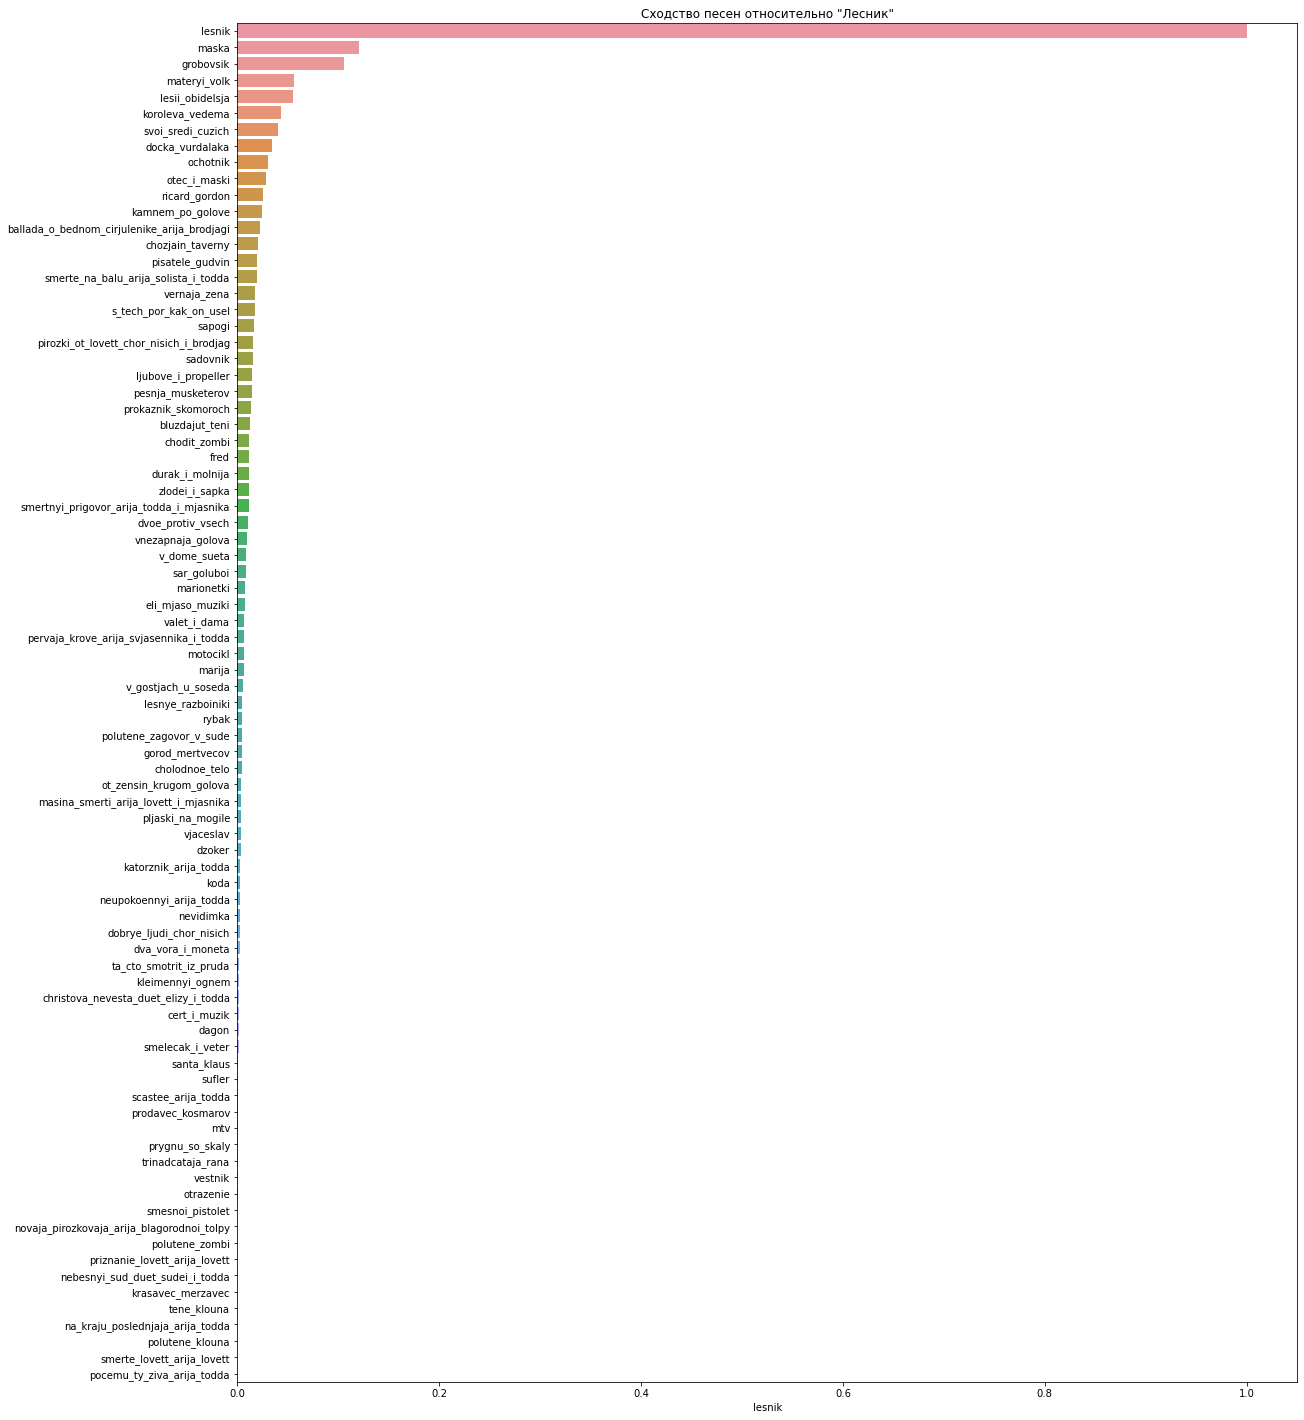

In [119]:
fig = plt.figure(figsize=(19,25))
ax = sns.barplot(y=cos_sim_lesnik.index, x=cos_sim_lesnik.lesnik, orient='h')
ax.set_title('Сходство песен относительно "Лесник"')

done in 0.260 sec


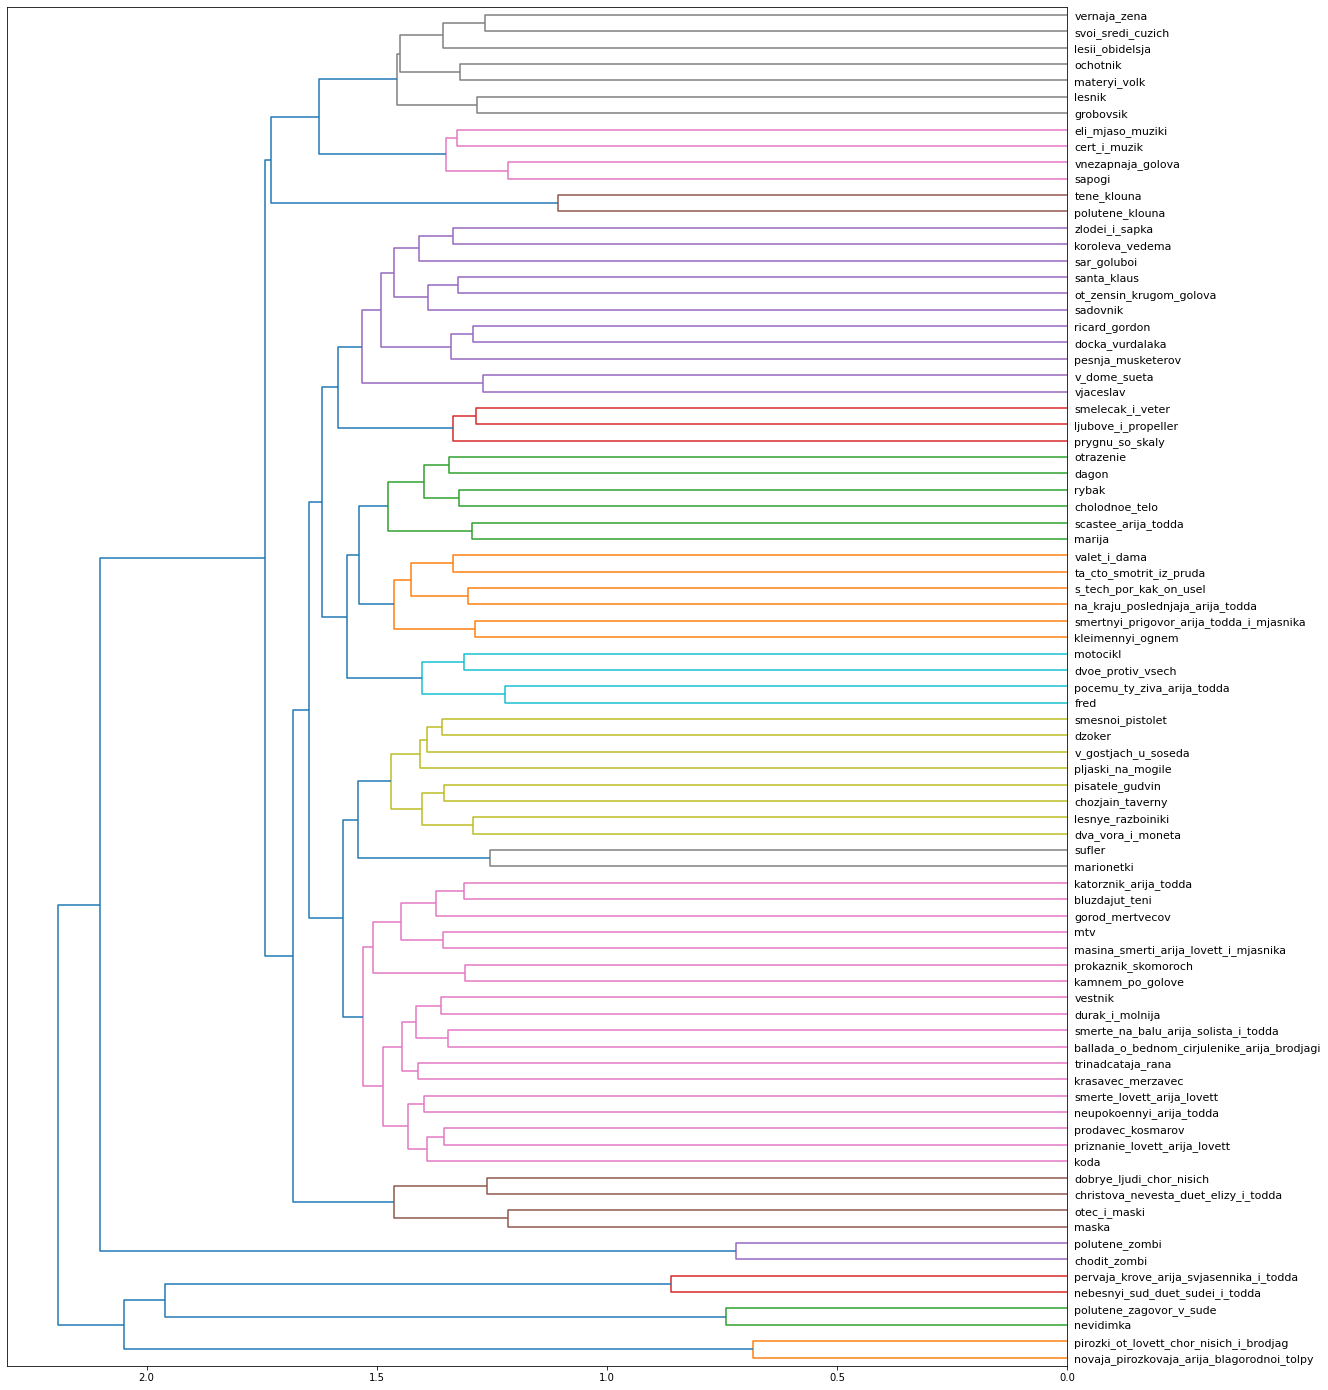

In [124]:
from scipy.cluster import hierarchy
from time import time

t0 = time()

clusters = hierarchy.linkage(cos_sim_df, method='ward')

fig = plt.figure(figsize=(19,25))
dendrogram = hierarchy.dendrogram(clusters, leaf_font_size=11, labels=list(cos_sim_df.index), orientation="left");

t = round(time() - t0,2)
print("done in %0.3f sec" % t)
!telegram-send "Job's_Done_in_{t}_seconds"

### Определим кластеры, не имея данных о классах. Классификация без учителя.

In [126]:
from sklearn.cluster import KMeans

In [131]:
# Определяем количество кластеров - строим график локтя
    

# создаем список для инерции
k_inertia = []
ks = range(1, 20)

# создаем массив из всех признаков Х1 и Х2. Нормализируем его. 
X = np.array(cos_sim)

for k in ks:
    clf_kmeans = KMeans( n_clusters = k )
    clusters_array = clf_kmeans.fit_predict( X )
    k_inertia.append( clf_kmeans.inertia_ )

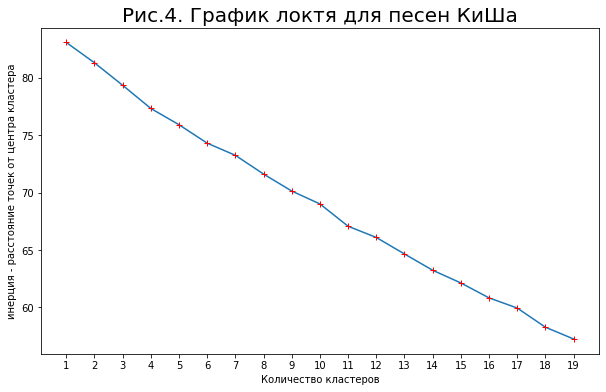

In [132]:
plt.figure(figsize=(10,6))
plt.title('Рис.4. График локтя для песен КиШа', fontsize = 20)
plt.plot(ks, k_inertia)
plt.xticks(ks)
plt.xlabel('Количество кластеров')
plt.ylabel('инерция - расстояние точек от центра кластера')
plt.plot(ks, k_inertia ,'+', color = 'red');

In [133]:
# указываем количество кластеров 8
kmeans = KMeans(n_clusters = 8, init='k-means++', max_iter=100)

# подбираем весовые коэффициенты параметров на обучающей выборке
clusters_kmeans = kmeans.fit(X)
!telegram-send "Job's_Done"

In [138]:
from sklearn.cluster import AgglomerativeClustering
aglo = AgglomerativeClustering(n_clusters = 8)
clusters_aglo = aglo.fit_predict(X)
clusters_aglo

array([0, 0, 2, 5, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 4, 7, 2, 1, 0, 0,
       3, 0, 7, 0, 0, 0, 6, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 6, 0, 0, 2, 0, 0, 2, 0, 0, 0], dtype=int64)

In [215]:
#Создаем мешок слов tf-idf
A = pd.DataFrame(data = list(dictionary))
for i in range(len(id_count)):
    A = A.merge(pd.DataFrame(data = tfidf[id_count[i]], columns=[0,titles[i]] ) ,how = 'outer',  on = 0  )
A

,0,ballada_o_bednom_cirjulenike_arija_brodjagi,bluzdajut_teni,cert_i_muzik,chodit_zombi,cholodnoe_telo,chozjain_taverny,christova_nevesta_duet_elizy_i_todda,dagon,dobrye_ljudi_chor_nisich,...,tene_klouna,trinadcataja_rana,valet_i_dama,vernaja_zena,vestnik,vjaceslav,vnezapnaja_golova,v_dome_sueta,v_gostjach_u_soseda,zlodei_i_sapka
0,0,0.012087,NaN,0.057732,NaN,0.069151,NaN,NaN,0.012503,NaN,...,NaN,0.019592,0.109786,0.100603,NaN,NaN,0.079191,0.043814,NaN,0.075752
1,1,0.013791,NaN,0.065872,NaN,0.026300,NaN,NaN,NaN,NaN,...,NaN,0.022355,0.125266,0.076526,NaN,NaN,0.090357,0.049992,NaN,0.064825
2,2,0.026825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.127877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.240210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087076,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,2612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100182
2613,2613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100182
2614,2614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100182
2615,2615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200364


In [216]:
A = A.drop(0,axis=1)
A.columns = range(len(id_count))
A = A.fillna(0)

In [227]:
# X - это мешок слов, Y - это категория из 'clusters_aglo'
y = clusters_aglo
X = np.array(A.T)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42 )

In [228]:
len(X_train), len(X_test), len(y_train), len(y_test) # Рзбивка выглядит хорошо

(58, 25, 58, 25)

## Получим ключевые слова каждого класса 
сначала построим логистическу регрессию , потом через коэффициенты получим ключевые слова

### Logistic Regression (LR)

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [229]:
lr = LogisticRegression(random_state = 30, solver = 'saga', max_iter=1000, warm_start = True, n_jobs = -1)
lr.fit(X_train, y_train )
lr_y_pred = lr.predict(X_test)
accuracy_score(y_test, lr_y_pred)

0.84

Процент точности =84%.

In [236]:
# Разбивка по клчевым словам
pd.DataFrame(data= lr.coef_, columns = dict(dictionary).values()).T

,0,1,2,3,4,5,6,7
«\n,-0.044855,0.029352,0.169033,-0.030497,-0.030573,-0.030804,-0.031505,-0.030149
»\n,-0.039856,0.014163,0.150624,-0.024799,-0.024879,-0.025062,-0.025664,-0.024525
ария,0.030689,-0.013436,-0.031594,0.017093,-0.009100,-0.008882,-0.009290,0.024521
баллада,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
бедный,0.039871,-0.005913,-0.014607,-0.003889,-0.003893,-0.003822,-0.003951,-0.003796
...,...,...,...,...,...,...,...,...
стремление,0.027301,-0.004017,-0.010057,-0.002685,-0.002693,-0.002601,-0.002638,-0.002611
сундук,0.027301,-0.004017,-0.010057,-0.002685,-0.002693,-0.002601,-0.002638,-0.002611
торговец,0.027301,-0.004017,-0.010057,-0.002685,-0.002693,-0.002601,-0.002638,-0.002611
характер,0.054603,-0.008034,-0.020114,-0.005370,-0.005385,-0.005202,-0.005276,-0.005223


In [237]:
words = []
for i in range(8):
    words.append(pd.DataFrame(data= lr.coef_, columns = dict(dictionary).values()).T.sort_values(i, ascending=False).head(10).index.tolist())
words

[['счастие',
  'ветер',
  'верить',
  'память',
  'круто',
  'мой',
  'джокер',
  'разбудить',
  'все',
  'тот'],
 ['отец',
  'наш',
  'благословлять',
  'добрый',
  'маска',
  'добро',
  'небесный',
  'имя',
  'ребенок',
  'пощадить'],
 ['мужик',
  'что',
  'дед',
  'э',
  'конюх',
  'коль',
  'старик',
  'волк',
  'плохо',
  'берег'],
 ['...',
  'отпускать',
  'боль',
  'рай',
  'виноватый',
  'слишком',
  'грех',
  'слабый',
  'жутко',
  'первый'],
 ['заговор',
  'суд',
  'мочь',
  'эксперимент',
  'невидимка',
  'судья',
  'недоумок',
  'краса',
  'кидать',
  'издеваться'],
 ['лоб',
  'зомби',
  'старуха',
  'уморить',
  'забор',
  'дрянь',
  'колба',
  'день-деньской',
  'выставлять',
  'лачуга'],
 ['клоун',
  'тень',
  'смех',
  'красться',
  'зритель',
  'чрево',
  'таять',
  'туча',
  'застилать',
  'цирк'],
 ['пирожок',
  'ловетта',
  'обед',
  'бывать',
  'дешевый',
  'весь',
  'высокий',
  'лондон',
  'поэт',
  'джентльмен']]

In [292]:
songs = dict()

for i in range(8):
    songs[i]=[]

for  i in range(len(titles)):
    songs[int(clusters_aglo[i])].append(titles[i])

songs

{0: ['ballada_o_bednom_cirjulenike_arija_brodjagi',
  'bluzdajut_teni',
  'cholodnoe_telo',
  'chozjain_taverny',
  'dagon',
  'docka_vurdalaka',
  'durak_i_molnija',
  'dva_vora_i_moneta',
  'dvoe_protiv_vsech',
  'dzoker',
  'fred',
  'gorod_mertvecov',
  'kamnem_po_golove',
  'katorznik_arija_todda',
  'kleimennyi_ognem',
  'koda',
  'koroleva_vedema',
  'krasavec_merzavec',
  'lesnye_razboiniki',
  'ljubove_i_propeller',
  'marija',
  'marionetki',
  'masina_smerti_arija_lovett_i_mjasnika',
  'motocikl',
  'mtv',
  'na_kraju_poslednjaja_arija_todda',
  'neupokoennyi_arija_todda',
  'otrazenie',
  'ot_zensin_krugom_golova',
  'pesnja_musketerov',
  'pisatele_gudvin',
  'pljaski_na_mogile',
  'pocemu_ty_ziva_arija_todda',
  'priznanie_lovett_arija_lovett',
  'prodavec_kosmarov',
  'prokaznik_skomoroch',
  'prygnu_so_skaly',
  'ricard_gordon',
  'rybak',
  'sadovnik',
  'santa_klaus',
  'sar_goluboi',
  'scastee_arija_todda',
  'smelecak_i_veter',
  'smerte_lovett_arija_lovett',
  'sm

In [295]:
songs_words = pd.DataFrame()
songs_words['songs'] = pd.Series(songs)
songs_words['words'] = words
songs_words

,songs,words
0,"[ballada_o_bednom_cirjulenike_arija_brodjagi, ...","[счастие, ветер, верить, память, круто, мой, д..."
1,"[christova_nevesta_duet_elizy_i_todda, dobrye_...","[отец, наш, благословлять, добрый, маска, добр..."
2,"[cert_i_muzik, eli_mjaso_muziki, grobovsik, le...","[мужик, что, дед, э, конюх, коль, старик, волк..."
3,"[nebesnyi_sud_duet_sudei_i_todda, pervaja_krov...","[..., отпускать, боль, рай, виноватый, слишком..."
4,"[nevidimka, polutene_zagovor_v_sude]","[заговор, суд, мочь, эксперимент, невидимка, с..."
5,"[chodit_zombi, polutene_zombi]","[лоб, зомби, старуха, уморить, забор, дрянь, к..."
6,"[polutene_klouna, tene_klouna]","[клоун, тень, смех, красться, зритель, чрево, ..."
7,"[novaja_pirozkovaja_arija_blagorodnoi_tolpy, p...","[пирожок, ловетта, обед, бывать, дешевый, весь..."


Можно посмотреть к каким песням группы "Король и Шут" относятся ключевые слова для сортировки по группам